In [1]:
import pandas as pd
import numpy as np 
import sklearn as sk
from sklearn import tree
from sklearn import datasets
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB


from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

import tensorflow as tf
import sklearn.svm as svm

/Users/normalazo/Desktop/env1/pythonEnv1/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(9876)

In [3]:
#Reading Data
df=pd.read_csv('/Users/normalazo/Desktop/env1/Final_Proyect/ML_Final_Proyect/sd_limpio_f.csv')
df.head()
test_size = .20
validation_size = .15

In [4]:
df.describe()

,match,age_diff,p_field_cd,p_race,p_imprace,p_imprelig,p_from,p_zipcode,p_income,p_goal,...,p_clubbing,p_reading,p_tv,p_theater,p_movies,p_concerts,p_music,p_shopping,p_yoga,p_exphappy
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.00000,4184.000000,4184.000000
mean,0.164914,4.168260,0.114962,0.396272,3.104685,3.117352,0.010755,0.044216,11560.111437,0.304493,...,2.811902,2.266252,2.998088,2.760516,1.972753,2.513623,2.094168,3.25000,3.211281,2.039197
std,0.371147,4.566389,0.319014,0.489181,2.510992,2.542932,0.103161,0.205599,12707.395375,0.460248,...,2.162918,1.985086,2.165846,2.045972,1.802520,1.990488,1.779562,2.27851,2.347181,1.713496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,667.250000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,7928.500000,0.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.00000,3.000000,2.000000
75%,0.000000,5.000000,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,18109.393550,1.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.00000,5.000000,3.000000
max,1.000000,37.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,85670.000000,1.000000,...,10.000000,11.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000


In [5]:
X=df[list(df.drop(['match'],inplace=False,axis=1))]
y=df['match']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=test_size,random_state=6)
X_train,X_Validation,Y_train,Y_Validation=train_test_split(X_train,Y_train,test_size=validation_size,random_state=6)


print "Numero de elementos en set de entrenamiento: " , len(X_train)
print "Numero de elementos en set de prueba: " , len(X_test)
print "Numero de elementos en set de Validacion: " , len(X_Validation)

Numero de elementos en set de entrenamiento:  2844
Numero de elementos en set de prueba:  837
Numero de elementos en set de Validacion:  503


# Naive Bayes

In [6]:
nb = GaussianNB()
nb_clf = nb.fit(X_train, Y_train)
prediction = nb_clf.predict(X_Validation)
print(classification_report(Y_Validation,prediction))
print(confusion_matrix(Y_Validation,prediction))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89       424
          1       0.29      0.14      0.19        79

avg / total       0.77      0.81      0.78       503

[[397  27]
 [ 68  11]]


# Entreno un arbol

In [7]:
#Entrenamos el un arbol
tree_class = tree.DecisionTreeClassifier(min_samples_leaf=2,max_depth=5)
tree_class = tree_class.fit(X_train, Y_train)

prediction=tree_class.predict(X_Validation)  
print(classification_report(Y_Validation,prediction))
print(confusion_matrix(Y_Validation,prediction))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       424
          1       0.33      0.01      0.02        79

avg / total       0.76      0.84      0.77       503

[[422   2]
 [ 78   1]]


# RANDOM FOREST


In [8]:
RF=RandomForestClassifier(criterion='gini', min_samples_split=2,n_estimators=1000,  max_depth = 25)
RF.fit(X_train,Y_train) 
prediction=RF.predict(X_Validation)  
print(classification_report(Y_Validation,prediction))
print(confusion_matrix(Y_Validation,prediction))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       424
          1       0.00      0.00      0.00        79

avg / total       0.71      0.84      0.77       503

[[424   0]
 [ 79   0]]


/Users/normalazo/Desktop/env1/pythonEnv1/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
RF.feature_importances_
#tree_class.feature_importances_

array([ 0.04208053,  0.00892698,  0.01140843,  0.03904711,  0.03817344,
        0.00204221,  0.00331097,  0.06391982,  0.01070693,  0.03057436,
        0.02425859,  0.04103761,  0.02372883,  0.03892401,  0.03969341,
        0.03816452,  0.03199499,  0.03441572,  0.03817279,  0.0386801 ,
        0.03868357,  0.03994326,  0.03290424,  0.03753471,  0.04061765,
        0.03204843,  0.03665045,  0.03382563,  0.03761019,  0.036517  ,
        0.03440352])

# Drop columns 

In [10]:
# importancia de cada variable
#feature_imp = RF.feature_importances_
feature_imp = tree_class.feature_importances_
drop = []
print(feature_imp)
for x in range(0, len(feature_imp)):
    if(feature_imp[x] < .05 ): # .3 -> 50%
        drop.append(x+1)
        
#print drop
df=df.drop(df.columns[drop], axis=1)
print (df.columns[:])

[ 0.          0.          0.          0.          0.01604434  0.          0.
  0.13966952  0.          0.          0.06424709  0.          0.09487123
  0.03854227  0.04523788  0.          0.02682375  0.05751902  0.13090234
  0.          0.          0.06572534  0.          0.06580977  0.08916066
  0.          0.06094229  0.06116996  0.          0.          0.04333456]
Index([u'match', u'p_income', u'p_go_out', u'p_expnum', u'p_museums', u'p_art',
       u'p_clubbing', u'p_tv', u'p_theater', u'p_concerts', u'p_music'],
      dtype='object')


In [11]:
X=df[list(df.drop(['match'],inplace=False,axis=1))]
y=df['match']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=test_size,random_state=6)
X_train,X_Validation,Y_train,Y_Validation=train_test_split(X_train,Y_train,test_size=validation_size,random_state=6)
print len(X_train)
print len(X_test)
print len(X_Validation)

2844
837
503


# Arbol

In [12]:
#Entrenamos el un arbol
tree_class = tree.DecisionTreeClassifier(min_samples_leaf=2,max_depth=5)
tree_class = tree_class.fit(X_train, Y_train)

prediction=tree_class.predict(X_Validation)  
print(classification_report(Y_Validation,prediction))
print(confusion_matrix(Y_Validation,prediction))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       424
          1       0.33      0.01      0.02        79

avg / total       0.76      0.84      0.77       503

[[422   2]
 [ 78   1]]


# NAIVE BAYES

In [13]:

nb = GaussianNB()
nb_clf = nb.fit(X_train, Y_train)
prediction = nb_clf.predict(X_Validation)
print(classification_report(Y_Validation,prediction))
confusion = confusion_matrix(Y_Validation, prediction)
print(confusion)

             precision    recall  f1-score   support

          0       0.86      0.96      0.91       424
          1       0.40      0.13      0.19        79

avg / total       0.78      0.83      0.79       503

[[409  15]
 [ 69  10]]


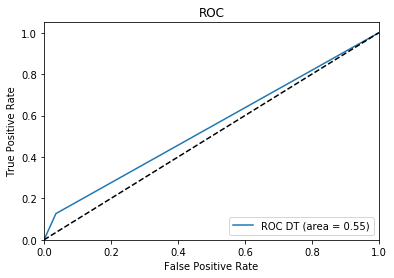

In [14]:
fpr, tpr, thresholds=roc_curve(Y_Validation,prediction)
dt_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC DT (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


# Random Forest

In [15]:
RF=RandomForestClassifier(criterion='gini', min_samples_split=2,n_estimators=1000, max_depth = 25)
RF.fit(X_train,Y_train) 
prediction=RF.predict(X_Validation)  
print(classification_report(Y_Validation,prediction))
print(confusion_matrix(Y_Validation,prediction))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91       424
          1       0.25      0.01      0.02        79

avg / total       0.75      0.84      0.77       503

[[421   3]
 [ 78   1]]


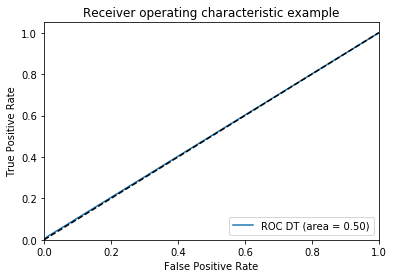

In [16]:
fpr, tpr, thresholds=roc_curve(Y_Validation,prediction)
dt_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC DT (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [17]:
prediction=RF.predict(X_test)  
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test,prediction))



             precision    recall  f1-score   support

          0       0.83      0.99      0.91       697
          1       0.29      0.01      0.03       140

avg / total       0.74      0.83      0.76       837

[[692   5]
 [138   2]]


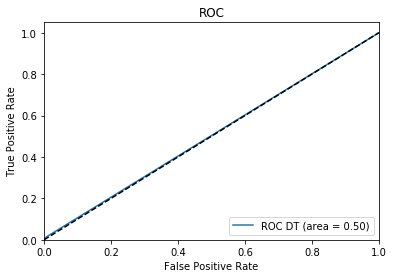

In [18]:
fpr, tpr, thresholds=roc_curve(Y_test,prediction)
dt_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC DT (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


In [19]:
prediction = nb_clf.predict(X_test)  
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test,prediction))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90       697
          1       0.27      0.07      0.11       140

avg / total       0.74      0.81      0.76       837

[[670  27]
 [130  10]]


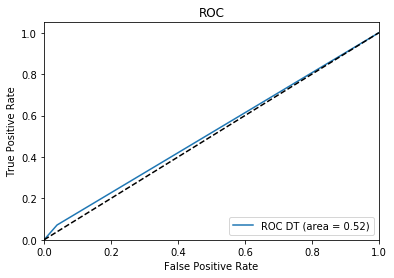

In [20]:
fpr, tpr, thresholds=roc_curve(Y_test,prediction)
dt_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC DT (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


# Neural Net


In [21]:
df.describe()

,match,p_income,p_go_out,p_expnum,p_museums,p_art,p_clubbing,p_tv,p_theater,p_concerts,p_music
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,0.164914,11560.111437,1.143881,1.055210,2.414197,2.650096,2.811902,2.998088,2.760516,2.513623,2.094168
std,0.371147,12707.395375,1.068688,2.874299,1.909324,2.054815,2.162918,2.165846,2.045972,1.990488,1.779562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,667.250000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,7928.500000,1.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
75%,0.000000,18109.393550,2.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,85670.000000,7.000000,20.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000


In [22]:
df.corr()

,match,p_income,p_go_out,p_expnum,p_museums,p_art,p_clubbing,p_tv,p_theater,p_concerts,p_music
match,1.000000,0.033444,-0.064659,0.037851,0.025033,0.018317,-0.021505,-0.022507,0.008577,0.003754,0.009057
p_income,0.033444,1.000000,-0.046941,0.029150,-0.006837,-0.002634,-0.037472,-0.015023,-0.001185,-0.043403,-0.010237
p_go_out,-0.064659,-0.046941,1.000000,-0.009046,0.051393,0.041330,0.045634,0.023358,-0.005120,0.074038,0.095951
p_expnum,0.037851,0.029150,-0.009046,1.000000,0.033818,0.019179,-0.038360,-0.005743,0.066601,-0.007548,0.012677
p_museums,0.025033,-0.006837,0.051393,0.033818,1.000000,0.738056,0.130190,0.035051,0.388727,0.295764,0.266225
p_art,0.018317,-0.002634,0.041330,0.019179,0.738056,1.000000,0.141554,0.028373,0.383743,0.262727,0.234695
p_clubbing,-0.021505,-0.037472,0.045634,-0.038360,0.130190,0.141554,1.000000,0.034625,0.112665,0.107515,0.122735
p_tv,-0.022507,-0.015023,0.023358,-0.005743,0.035051,0.028373,0.034625,1.000000,0.075965,0.048583,0.083285
p_theater,0.008577,-0.001185,-0.005120,0.066601,0.388727,0.383743,0.112665,0.075965,1.000000,0.281456,0.211382
p_concerts,0.003754,-0.043403,0.074038,-0.007548,0.295764,0.262727,0.107515,0.048583,0.281456,1.000000,0.481044


# SVM